<a href="https://colab.research.google.com/github/Ardaolmez/Neuroscience-Projects/blob/main/Shot_Noises_and_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises: Shot noise

### 1. Gamma spike train (3 points)

__(a)__ (1 point) Write a function `gamma_spike_train(r, T, g)` that returns a realisation of a Gamma process (array of sorted spike times $[t_0, \dots, t_k, \dots]$ with $t_{i-1} < t_i \forall i$) with rate $r$, integer order $\gamma$ and trial duration $T$ (see "decimation procedure" in last exercise). Use $\gamma = 1$ as a default value for the order of the Gamma process (which corresponds to generating a Poisson process). Within the function, test whether the parameter values make sense ($T > 0, r > 0, \gamma > 0$, $\gamma$ must be an integer) and raise an error if they do not.

Hint: you might want to look into the `raise` statement for exceptions (https://docs.python.org/3/library/exceptions.html), and the `isinstance` statement (https://docs.python.org/3/library/functions.html#isinstance) to check the type of a variable.

In [1]:
# type your code here.
import numpy as np
import matplotlib.pyplot as plt



np.set_printoptions(suppress=True)

def draw3(r,T,g):
    if not ((isinstance(T, float) or isinstance(T, int)) and isinstance(g, int)  and (isinstance(r,float) or isinstance(r, int))):
            raise TypeError('Got  wrong type argument')
    if not(T>0 and r>0 and g>0):
        raise TypeError("All parameter should be greater than 0")
    N=r*T
    lst=list(np.random.uniform(0,T,N))
    lst=np.sort(lst)
    lst=lst[::g]
    return lst

drawing3=draw3(10,600,2)


print(drawing3)


[  0.00548539   0.52202726   0.62346174 ... 599.30668129 599.52636889
 599.96731237]


__(b)__ (1 point) Compute the average firing rate (time average) of a single realization. Is it identical to the target rate $r$? If not why?

In [2]:
# type your code here.
firing_rate=len(drawing3)/600
print(firing_rate)
'''
We jump every second value for gamma spike train.Thats why it is different(half)
than target rate r.

'''

5.0


'\nWe jump every second value for gamma spike train.Thats why it is different(half) \nthan target rate r.\n\n'

__(c)__ (1 point) Visualise multiple realizations of gamma spike trains for a specific set of parameters (i.e., create a raster plot for $N$ neurons with neuron id on the y-axis and time on the x-axis, see lecture).

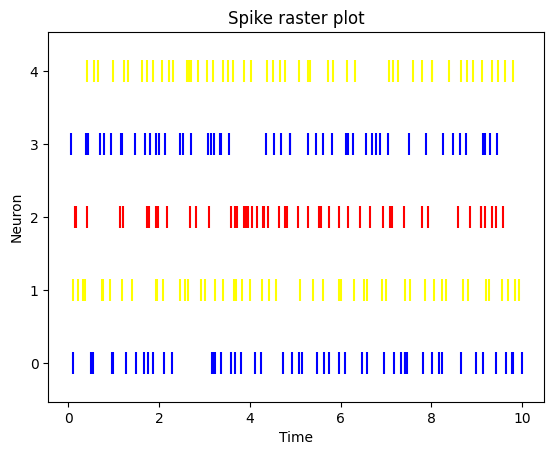

In [3]:
# type your code here.
import math
def rasterplot(N,r,T,g):
    total=(r*T)/g
    neuralcode=np.zeros((N,math.ceil(total)))
    for i in range(N):

        neuralcode[i:]=draw3(r,T,g)
    lineSize = [0.3]*N
    colorCodes = np.zeros((N,3))
    for i in range(N):
        if i%3==0:
            colorCodes[i:]=[0,0,1]
        elif i%3==1:
             colorCodes[i:]=[1,1,0]
        else:
            colorCodes[i:]=[1,0,0]
    plt.eventplot(neuralcode,linelengths=lineSize,
                  color=colorCodes)
    plt.title('Spike raster plot')
    plt.xlabel('Time')
    plt.ylabel('Neuron')
    plt.show()
rasterplot(5,10,10,2)

### 2. Filter kernel (3 points)

__(a)__ (2 points) Write a function `exponential_filter_kernel(t, tau)` which returns an exponential function for $t\ge 0$ and zero otherwise:
$$
h(t) =
\begin{cases}
e^{−t/\tau}, t \ge 0 \\
0, \text{else}
\end{cases}
$$
with time constant $\tau$. Test whether the parameter `tau` provided to the function makes sense ($\tau > 0$).

In [6]:
# type your code here.
def exponential_filter_kernel(t, tau):
    if tau <= 0:
        raise ValueError("tau must be greater than 0")
    if t < 0:
        return 0
    return np.exp(-t / tau)
print(exponential_filter_kernel(2, 2))


0.36787944117144233


__(b)__ (1 point) Visualise the filter kernel for a given time constant $\tau$ (see lecture).

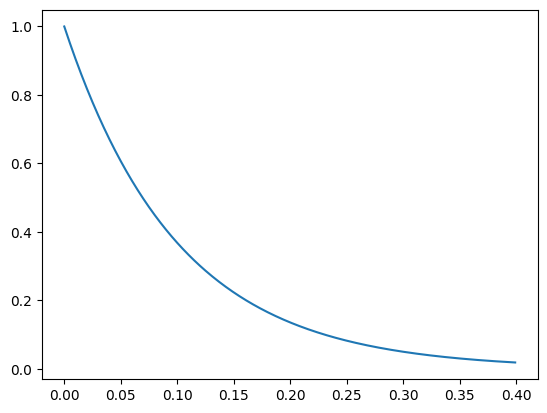

In [7]:
# type your code here.
x = np.arange(0,0.4,0.001)
y = list(map(lambda z :exponential_filter_kernel(z, 0.1),x))
plt.plot(x,y)
plt.show()


### 3. Shot noise (4 points)
__(a)__ (3 points) Write a function `shot_noise(spike_times, T, dt, filter_kernel, *args)` generating a shot-noise process by convolving a spike train `spike_times` (array of spike times) with some filter kernel function given as argument `filter_kernel` (hint: use a function as argument here). The parameters of the filter kernel can be passed via `*args` (e.g. the time constant for the case of an exponential filter from problem 2.). The parameters `T` and `dt` represent the length (duration) and the time resolution of the resulting shot-noise signal, respectively. As before, test whether the parameters `spike_times`, `T`, `dt` provided to the function make sense.  
Hint: for the case of spike trains, the convolution integral can be expressed in terms of a sum. To see this, let’s write the spike train $s(t)$ in form of a sum of Dirac delta functions $\delta(t − t_k)$ centered at the spike times $t_k$ (the elements of spike_times):
$$
s(t) = \sum_k \delta(t-t_k)
$$
Now, the convolution integral reads:
\begin{align}
(s \ast h)(t) =& \int_{-\infty}^t dt' s(t')h(t-t') \\
=& \sum_k \int_{-\infty}^t dt' \delta(t'-t_k)h(t-t') \\
=& \sum_k h(t-t_k)
\end{align}
Here, the last equality follows from the property (or, rather, definition) of the Dirac delta function:
$$
\int dt' \delta(t-t')f(t') = f(t)
$$

In [12]:
# type your code here.
def shot_noise(spike_times, T, dt, filter_kernel, *args):
    if not (isinstance(T, (int, float)) and isinstance(dt, (int, float))):
        raise TypeError("T and dt should be int or float")
    if not (all(isinstance(st, (int, float)) for st in spike_times)):
        raise TypeError("spike_times should contain int or float values")
    if not (T > 0 and dt > 0 and all(st > 0 for st in spike_times)):
        raise ValueError("All parameters should be greater than 0")

    ranger = []
    t = 0
    while t < T:
        ranger.append(t)
        t += dt

    filter_values = np.zeros(len(ranger))
    for i in range(len(ranger)):
        for j in range(len(spike_times)):
            k = filter_kernel(ranger[i] - spike_times[j], *args)
            filter_values[i] += k

    plt.figure(1)
    plt.eventplot(spike_times)
    plt.title('Spike Times')
    plt.xlabel('Time')
    plt.ylabel('Spikes')

    y = list(map(lambda z: exponential_filter_kernel(z, 0.1), ranger))
    plt.figure(2)
    plt.plot(ranger, y)
    plt.xlim([0, 0.4])
    plt.title('Exponential Filter Kernel')
    plt.xlabel('Time')
    plt.ylabel('Kernel Value')

    plt.figure(3)
    plt.plot(ranger, filter_values)
    plt.title('Filtered Values')
    plt.xlabel('Time')
    plt.ylabel('Filtered Value')
    plt.show()

    return filter_values



__(b)__ (1 point) Visualise the shot-noise process resulting from the convolution of a Gamma spike train with an exponential filter kernel for an example parameter set (see lecture for an example).

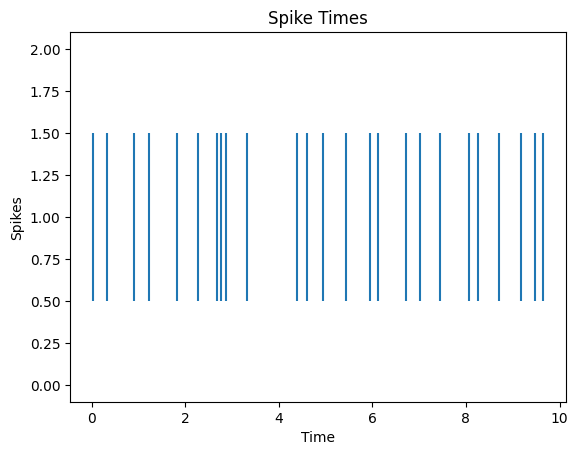

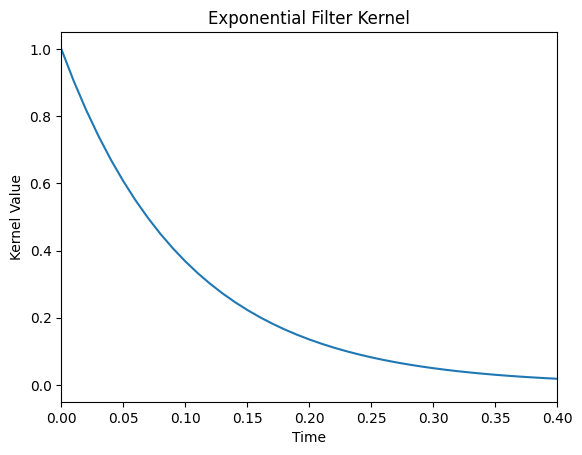

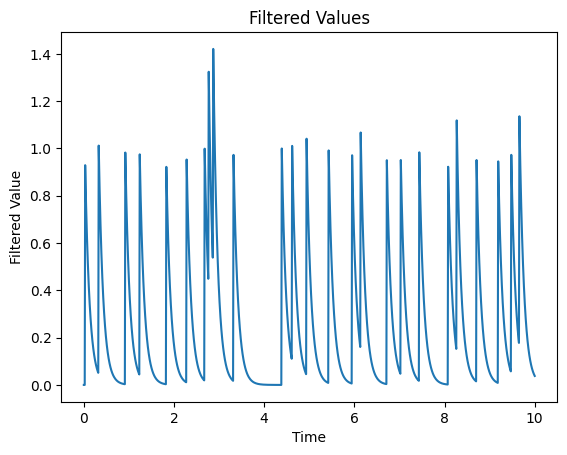

array([0.        , 0.        , 0.        , ..., 0.04630341, 0.04189706,
       0.03791002])

In [13]:
# type your code here.
drawing4=draw3(10,10,4)

shot_noise(drawing4, 10, 0.01,exponential_filter_kernel, 0.1 )